#### WRF output cross section from <a href="https://wrf-python.readthedocs.io/en/latest/plot.html#cross-example">wrf-python examples</a> (Adapted by Lauren Getker)
This code utilizes wrf-python's CoordPair and vertcross codes to create vertical cross sections from WRF output files.
Adapted from wrf-python documentation

In [52]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from wrf import to_np, getvar, CoordPair, vertcross
import matplotlib.patches as mpatches

#Name of file to create cross section from
filename = "/home/getker/wrf_hugo/wrf_mp_test/wrfout_d01_1989-09-22_03:00:00"

#Acceleration of gravity (constant) for converting to geopotential height
g = 9.8

#Latitude of first cross section point
lat1 = 30.15

#Longitude of first cross section point
lon1 = -80.97

# Latitude of second cross section point
lat2 = 32.96

#Longitude of second cross section point
lon2 = -78.21

In [57]:
"""
Open the wrfout file and get geopotential height data to use as our vertical 
"""
data = Dataset(filename, "r", format="NETCDF4")
ph = getvar(data, "PH") # get geopotential perturbation 
phb = getvar(data, "PHB") # get geopotential base state 
z = ph + phb #Add base state and perturbation to get geopotential height
z = (z / 9.8) / 1000 #Convert value to km

z_notop = z[0:49]

w =  getvar(data, 'W')
print(w)
#ice = getvar(data, 'QICE')
cloud = getvar(data, 'QCLOUD')
vapor = getvar(data, 'QVAPOR')
#graup = getvar(data, 'QGRAUP')
#snow = getvar(data, 'QSNOW')
rain = getvar(data, 'QRAIN')


# Create the start point and end point for the cross section
start_point = CoordPair(lat=30.15, lon=-80.97)
end_point = CoordPair(lat=32.96, lon=-78.21)

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
w_cross = vertcross(w, z, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

#ice_cross = vertcross(ice, z_notop, wrfin=data, start_point=start_point,
#                       end_point=end_point, latlon=True, meta=True)

cloud_cross = vertcross(cloud, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

vapor_cross = vertcross(vapor, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

#graup_cross = vertcross(graup, z_notop, wrfin=data, start_point=start_point,
#                       end_point=end_point, latlon=True, meta=True)

#snow_cross = vertcross(snow, z_notop, wrfin=data, start_point=start_point,
#                       end_point=end_point, latlon=True, meta=True)

rain_cross = vertcross(rain, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

<xarray.DataArray 'W' (bottom_top_stag: 50, south_north: 310, west_east: 343)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -0.00000000e+00, -3.72641883e-03, -3.46938521e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -6.17744092e-07, -1.37209531e-03, -9.37285717e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -4.73561528e-08, -1.28285728e-06,  1.77391514e-04],
        ...,
        [-1.55319776e-02, -1.09919896e-02, -7.71043636e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-2.44738888e-02, -1.56609584e-02, -9.06915497e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.43644093e-02, -1.57677792e-02, -1.51406666e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 2.73184502e-04,  2.72935518e-04,  1.21250807e-04, ...,
         -3.34182318e-04, -4.93864389e-03, -5.90329571e-03],
        [ 2.72908364e-04

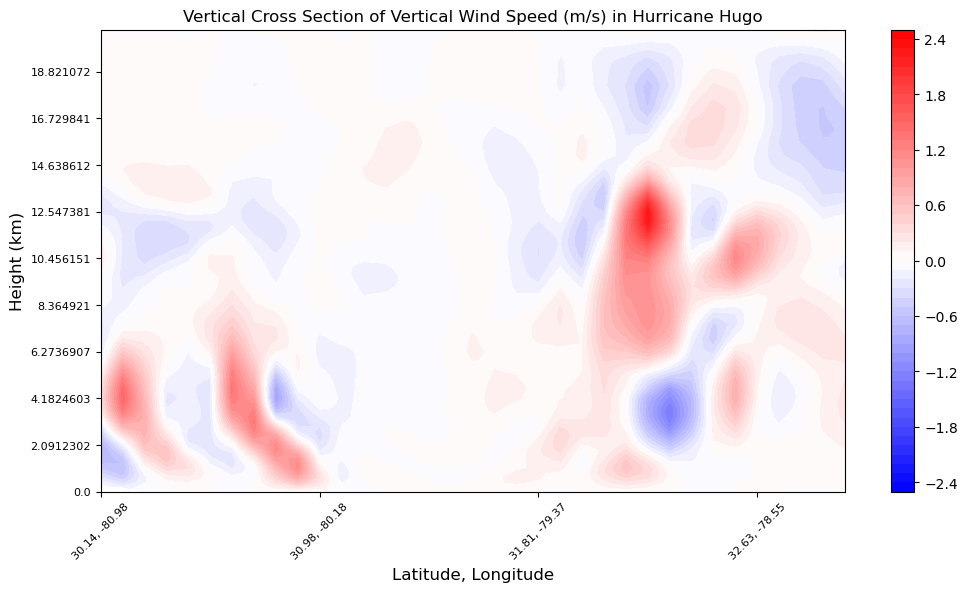

In [54]:
"""
Now, plot our cross section. You may need to edit parts of this cell to match your desired variable.
You can also get additional variables and contour them.
"""
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Contours -- make sure to modify levels here
wspd_contours = ax.contourf(to_np(w_cross), cmap="bwr", levels = np.arange(-2.5, 2.6, .1))

plt.colorbar(wspd_contours, ax=ax)

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(w_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_xticks(x_ticks[::10])
ax.set_xticklabels(x_labels[::10], rotation=45, fontsize=8)


# Set the y-ticks to be height.
vert_vals = to_np(w_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[::10])
ax.set_yticklabels(vert_vals[::10], fontsize=8)

#plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=12)
ax.set_ylabel("Height (km)", fontsize=12)

plt.title("Vertical Cross Section of Vertical Wind Speed (m/s) in Hurricane Hugo")

plt.show()
fig.savefig('hugo_w_cross_section_19890922T0300.png',
            bbox_inches='tight',transparent=False,facecolor='white')

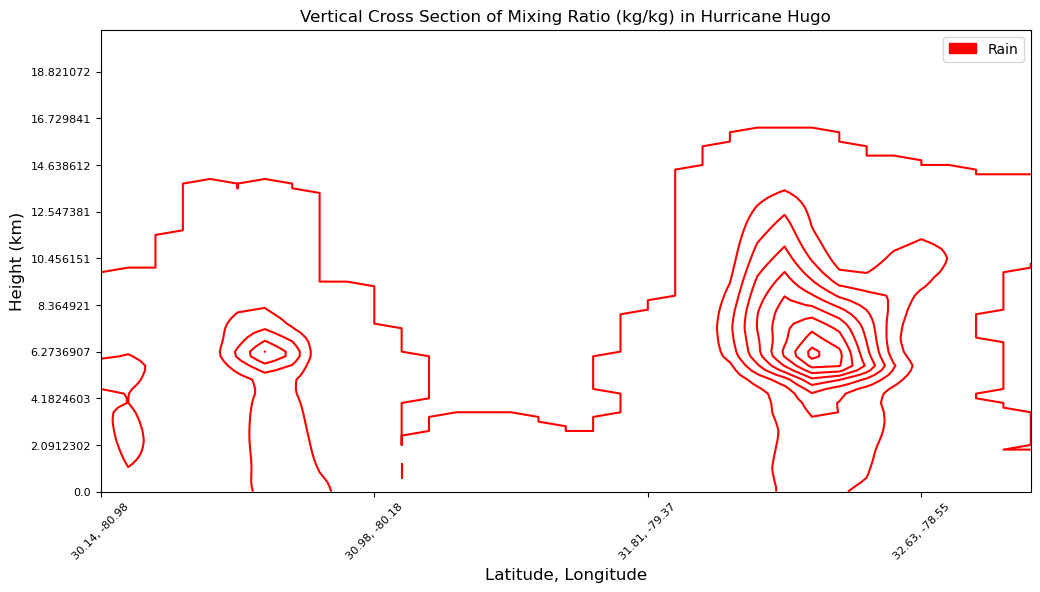

In [59]:
"""
Now, plot our cross section. You may need to edit parts of this cell to match your desired variable.
You can also get additional variables and contour them.
"""
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Contours -- make sure to modify levels here
#wspd_contours = ax.contourf(to_np(wspd_cross), cmap="bwr", levels = np.arange(-2, 2.1, .1))
ax.contour(to_np(rain_cross), colors = ('r',), levels = 10)
#ax.contour(to_np(ice_cross), colors = ('b',), levels = 10)
#ax.contour(to_np(graup_cross), colors = ('g',), levels = 10)
#ax.contour(to_np(snow_cross), colors = ('b',), levels = 10)
#ax.contour(to_np(vapor_cross), colors = ('#b603fc',))
# ax.contour(to_np(cloud_cross), colors = ('#fc8403',))
#plt.colorbar(wspd_contours, ax=ax)

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(w_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_xticks(x_ticks[::10])
ax.set_xticklabels(x_labels[::10], rotation=45, fontsize=8)


# Set the y-ticks to be height.
vert_vals = to_np(w_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[::10])
ax.set_yticklabels(vert_vals[::10], fontsize=8)

#plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=12)
ax.set_ylabel("Height (km)", fontsize=12)

plt.title("Vertical Cross Section of Mixing Ratio (kg/kg) in Hurricane Hugo")
red_patch = mpatches.Patch(color='red', label='Rain')
ax.legend(handles=[red_patch])
plt.show()
fig.savefig('hugo_q_cross_section_19890922T0300.png',
            bbox_inches='tight',transparent=False,facecolor='white')